In [1]:
import argparse
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path
import pickle

from uncertainties import ufloat, unumpy
#import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)


def Read_Pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
        
    return data 

In [20]:
period = "ADE"
reweight = "quark"
doreweight = 1 #for reweighting syst

var = "ntrk" #ntrk, bdt, newBDT

reweighting_map = {
        "none" : "NoReweighting",
        "quark" : "Reweighting_Quark_Factor",
        "gluon" : "Reweighting_Gluon_Factor"
    }
var_map = {
     "ntrk":'jet_nTracks',
     "bdt":'jet_trackBDT',
     "newBDT":'GBDT_newScore'
    }
    
WPs = [0.5, 0.6, 0.7, 0.8]
bin_edges = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
bin_centers = 1/2 * (bin_edges[:-1] + bin_edges[1:])

In [21]:
nominal_SF_path = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")

nominal_SF = Read_Pickle(nominal_SF_path)




In [22]:
#nominal_SF['jet_nTracks'][0.5]['Quark']
nominal_SF['jet_nTracks'][0.7]['Quark']

array([1.0352205652032167+/-0.0017011483051823089,
       1.043098224657202+/-0.001448690009722967,
       1.044462388283926+/-0.002625696295110133,
       1.0346668097870235+/-0.005167344703932257,
       1.02319829003826+/-0.009124086389003307,
       1.0065349893921092+/-0.020054854222051104], dtype=object)

(0.9, 1.1)

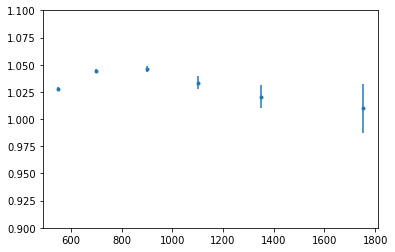

In [23]:
fig, ax = plt.subplots()

SF_quark = nominal_SF['jet_nTracks'][0.5]['Quark']
ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none', label = "quark SF", marker='.')

ax.set_ylim(0.9, 1.1)

In [24]:
SFs = {}


if doreweight:
    SF_path = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/ADE/SFs_pkls/{var}_Reweighting_Gluon_Factor/{var_map[var]}/SFs.pkl")
    SFs = Read_Pickle(SF_path)
    
else:
    systs = ["jet_nTracks_sys_eff","jet_nTracks_sys_fake"]

    for syst in systs:
        SF_path = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/trk_eff/{syst}/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")
        SFs[syst] = Read_Pickle(SF_path)
    

quark reweiting sys:  [-0.00515657 -0.00148617 -0.00064852  0.00042092  0.00043281 -0.00024421] gluon reweiting sys:  [0.00057375 0.0007523  0.00143901 0.00298122 0.00259674 0.00180987]
quark reweiting sys:  [-0.00194765 -0.00143445 -0.00073727  0.0001595  -0.00240658 -0.00040275] gluon reweiting sys:  [-0.00059536  0.00026376  0.00091006  0.00227994  0.0052835   0.00065713]
quark reweiting sys:  [-1.76004769e-03 -1.26847689e-03 -6.74319397e-04 -2.20012186e-05
  4.81917228e-05 -5.40231447e-05] gluon reweiting sys:  [-0.0011896  -0.00030487  0.00034277  0.00167152  0.00137172  0.00188246]
quark reweiting sys:  [-1.23727736e-03 -9.22459741e-04 -5.41463707e-04 -1.13947539e-06
  1.02840733e-04  2.99633502e-06] gluon reweiting sys:  [-1.73947603e-03 -9.35517971e-04 -8.24872336e-05  7.78190022e-04
  7.68415373e-04  1.63971967e-03]


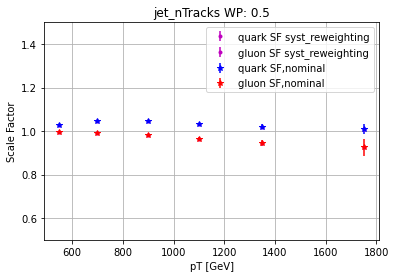

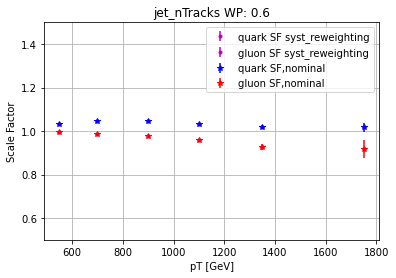

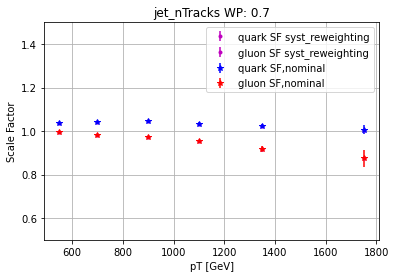

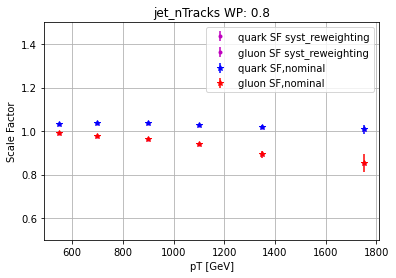

In [25]:
for WP in WPs:
    fig, ax = plt.subplots()
    SF_quark = nominal_SF[f"{var_map[var]}"][WP]['Quark']
    SF_g = nominal_SF[f"{var_map[var]}"][WP]['Gluon']

    if doreweight:
        SF_quark_eff = SFs[f"{var_map[var]}"][WP]['Quark']
        SF_g_eff = SFs[f"{var_map[var]}"][WP]['Gluon']
        err_eff = unumpy.nominal_values(SF_quark - SF_quark_eff)
        err_eff_g = unumpy.nominal_values(SF_g - SF_g_eff)
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr =err_eff, linestyle='none',fmt='m',label = f"quark SF syst_reweighting", marker='.')
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = err_eff_g, linestyle='none',fmt='m',label = f"gluon SF syst_reweighting", marker='.')


    else:
        SF_quark_eff = SFs["jet_nTracks_sys_eff"][f"{var_map[var]}"][WP]['Quark']
        SF_quark_fake = SFs["jet_nTracks_sys_fake"][f"{var_map[var]}"][WP]['Quark']
        SF_g_eff = SFs["jet_nTracks_sys_eff"][f"{var_map[var]}"][WP]['Gluon']
        SF_g_fake = SFs["jet_nTracks_sys_fake"][f"{var_map[var]}"][WP]['Gluon']
    
        err_eff = unumpy.nominal_values(SF_quark - SF_quark_eff)
        err_fake = unumpy.nominal_values(SF_quark - SF_quark_fake)
        rms = np.sqrt(err_eff**2+err_fake**2)
        
        err_eff_g = unumpy.nominal_values(SF_g - SF_g_eff)
        err_fake_g = unumpy.nominal_values(SF_g - SF_g_fake)
        rms_g = np.sqrt(err_eff_g**2+err_fake_g**2)
    
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = rms, linestyle='none',fmt='none',ecolor = 'm',label = f"quark track uncertainty", marker='.')
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = rms_g, linestyle='none',fmt='none',ecolor = 'm',label = f"gluon track uncertainty", marker='.')
        ax.fill_between(bin_centers,unumpy.nominal_values(SF_quark)-rms,unumpy.nominal_values(SF_quark)+rms, edgecolor='none',alpha=0.3, facecolor='m')#edgecolor='m',hatch="x")
        ax.fill_between(bin_centers,unumpy.nominal_values(SF_g)-rms_g,unumpy.nominal_values(SF_g)+rms_g, edgecolor='none',alpha=0.3,facecolor='m') #edgecolor='m', hatch="x")


        
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none',fmt = 'b', label = f"quark SF,nominal", marker='*')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = unumpy.std_devs(SF_g), linestyle='none',fmt = 'r', label = f"gluon SF,nominal", marker='*')


    #ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark_fake), yerr = unumpy.std_devs(SF_quark_fake), linestyle='none',fmt='g',label = f"quark SF,syst_ntrk_fake", marker='+')
    #ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = err_eff_g, linestyle='none',fmt='m',label = f"quark SF syst_ntrk_eff", marker='^')
    ax.legend()

    ax.set_title(f"{var_map[var]} WP: {WP}")
    ax.set_xlabel("pT [GeV]")
    ax.set_ylabel("Scale Factor")
    ax.set_ylim(0.5, 1.5)
    ax.grid()
    if doreweight:
        plt.savefig(f"/eos/user/w/wasu/NewWorkflow/plots/{var_map[var]}_SF_reweight_{WP}.pdf", dpi=300)
        print("quark reweiting sys: ",err_eff, "gluon reweiting sys: ",err_eff_g)
    else:
        plt.savefig(f"/eos/user/w/wasu/NewWorkflow/plots/{var_map[var]}_SF_trk_{WP}.pdf", dpi=300)
        print("quark trk sys: ",rms, "gluon trk sys: ",rms_g)
        #print("err_eff_g: ",err_eff_g,"err_fake_g: ",err_fake_g)
        #print("err_eff: ",err_eff,"err_fake: ",err_fake)

    #     ax.set_ylim(0.9, 1.1)
